In [67]:
# Kütüphaneler
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [68]:
# CSV Üzerinden Datalar Çekiliyor
color = sns.color_palette()
df = pd.read_csv('bitcoin.csv')
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


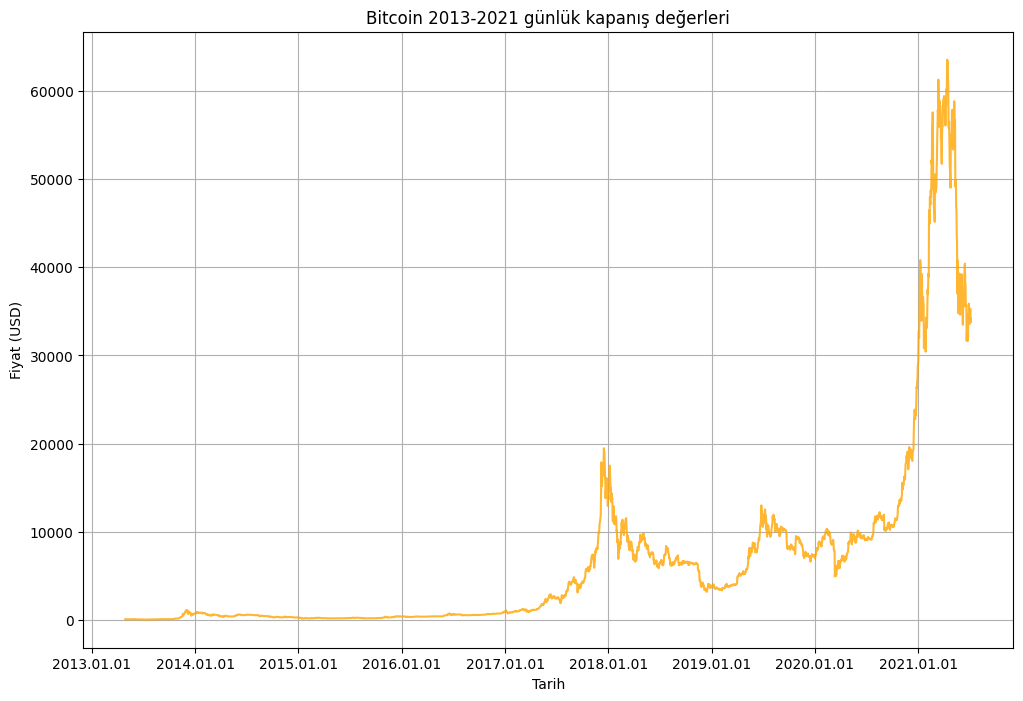

In [69]:
# Bitcoin 2013-2021 Günlük Kapanış Değerleri
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Date', y='Close', alpha=0.8, color='orange')
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
plt.xlabel('Tarih')
plt.ylabel('Fiyat (USD)')
plt.title("Bitcoin 2013-2021 günlük kapanış değerleri")
plt.grid(True)
plt.show()

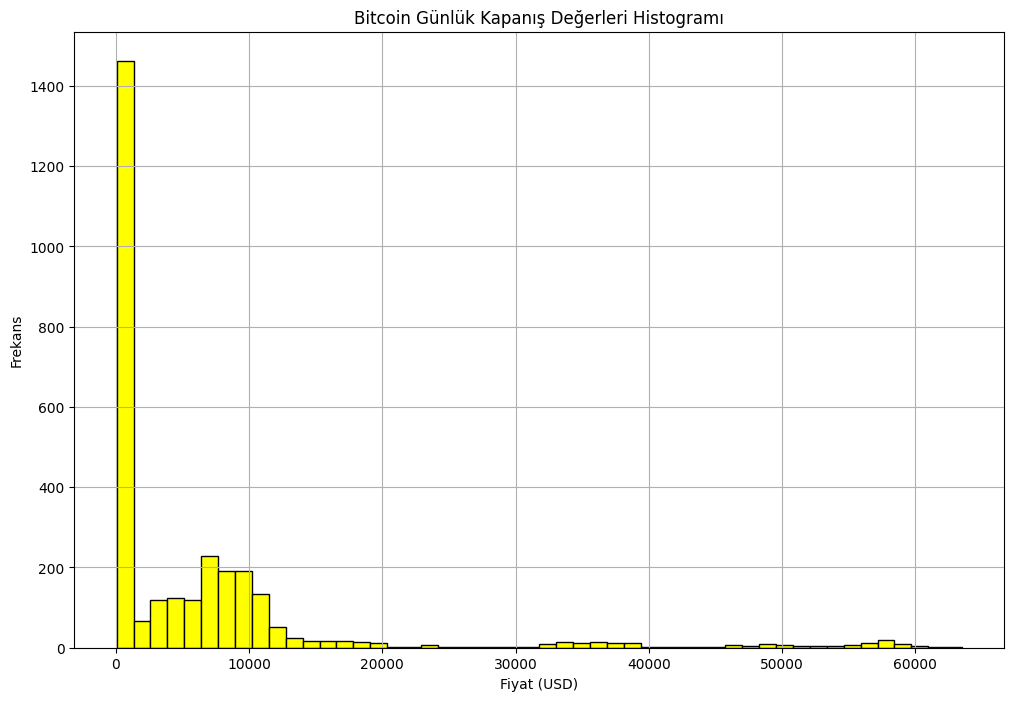

In [70]:
# Bitcoin'in Günlük Kapanış Değerleri Histogramı
plt.figure(figsize=(12, 8))
plt.hist(df['Close'], bins=50, edgecolor='k', color='yellow')
plt.title('Bitcoin Günlük Kapanış Değerleri Histogramı')
plt.xlabel('Fiyat (USD)')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()

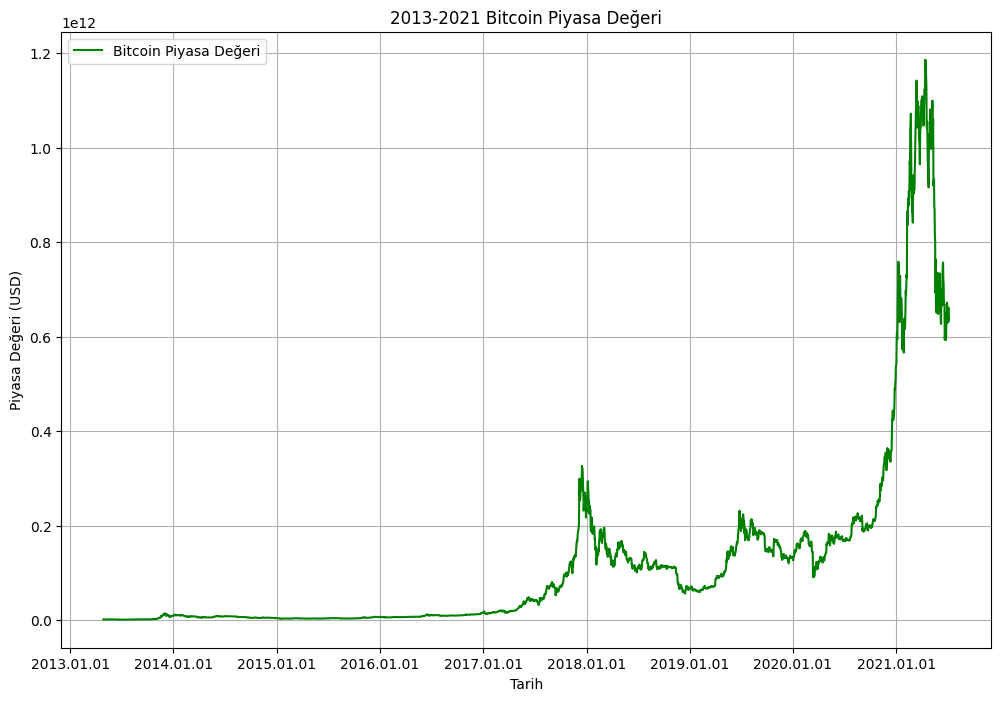

In [71]:
# Yıllara Göre Bitcoin Piyasa Değeri
plt.figure(figsize=(12, 8))
plt.plot(df['Date'], df['Marketcap'], label='Bitcoin Piyasa Değeri', color='green')
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
plt.title('2013-2021 Bitcoin Piyasa Değeri')
plt.xlabel('Tarih')
plt.ylabel('Piyasa Değeri (USD)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [72]:
# Günlük Kapanış Değerlerinin Tek Bir Dizide Toplanması
bitcoin_df = pd.read_csv('bitcoin.csv')
projection_bitcoin = 30
bitcoin_df['Prediction'] = bitcoin_df[['Close']].shift(-projection_bitcoin)
X_Bitcoin = np.array(bitcoin_df[['Close']])
X_Bitcoin = X_Bitcoin[:-projection_bitcoin]
print(X_Bitcoin)

[[  144.53999329]
 [  139.        ]
 [  116.98999786]
 ...
 [36894.40532994]
 [35551.95872588]
 [35862.37772747]]


In [73]:
# Günlük Kapanış Değerlerinin Test Edilmesi
y_Bitcoin = bitcoin_df['Prediction'].values
y_Bitcoin = y_Bitcoin[:-projection_bitcoin]
print(y_Bitcoin)
x_train_Bitcoin, x_test_Bitcoin, y_train_Bitcoin, y_test_Bitcoin = train_test_split(X_Bitcoin,y_Bitcoin,test_size=0.80)

[  132.30000305   128.79899597   129.         ... 35287.77976616
 33746.00245614 34235.19345116]


In [74]:
#Lineer Regresyonun Güvenilirlik Analizi
linReg_Bitcoin = LinearRegression()
linReg_Bitcoin.fit(x_train_Bitcoin,y_train_Bitcoin)
linReg_confidence_Bitcoin = linReg_Bitcoin.score(x_test_Bitcoin,y_test_Bitcoin)
print("Bitcoin için Lineer Regresyon Güvenirliği: %",round((linReg_confidence_Bitcoin*100),3))

Bitcoin için Lineer Regresyon Güvenirliği: % 91.324


In [75]:
# Son 14 Günün Değerleri Ele Alınır
x_projection_Bitcoin = np.array(bitcoin_df[['Close']])[-projection_bitcoin:]
print(x_projection_Bitcoin)

[[33560.70783776]
 [33472.63174808]
 [37345.12148619]
 [36702.59937466]
 [37334.39952553]
 [35552.51714847]
 [39097.86089667]
 [40218.47785943]
 [40406.26898673]
 [38347.06322666]
 [38053.50417253]
 [35787.24478177]
 [35615.86927002]
 [35698.29644336]
 [31676.69373254]
 [32505.6598245 ]
 [33723.0289781 ]
 [34662.43589358]
 [31637.78005541]
 [32186.27767093]
 [34649.64458753]
 [34434.33531428]
 [35867.77773549]
 [35040.83724889]
 [33572.11765253]
 [33897.04858963]
 [34668.54840182]
 [35287.77976616]
 [33746.00245614]
 [34235.19345116]]


In [76]:
# Sonraki 14 Gün İçin Fiyat Tahminleri 
linReg_prediction_Bitcoin = linReg_Bitcoin.predict(x_projection_Bitcoin)
print(linReg_prediction_Bitcoin)

[32752.38837402 32667.75026716 36389.08032899 35771.63857685
 36378.77689187 34666.44893109 38073.40289661 39150.27743297
 39330.73827719 37351.91203964 37069.81183875 34892.01415068
 34727.32815101 34806.53784265 30941.91531901 31738.52335334
 32908.37343275 33811.11131749 30904.52060751 31431.60803795
 33798.81931029 33591.91446991 34969.40356212 34174.74206519
 32763.35281539 33075.60032178 33816.98522864 34412.0453701
 32930.45015863 33400.54595717]


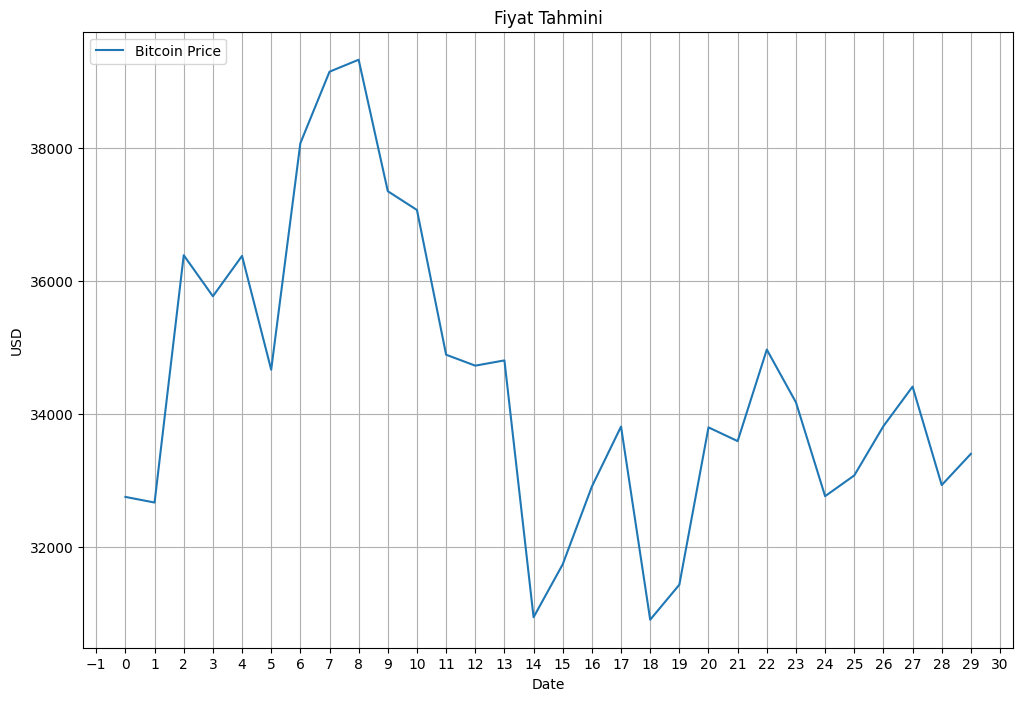

In [77]:
# Tahmin Değerlerinin Tabloda Gösterilmesi
plt.figure(figsize=(12, 8))
plt.plot(linReg_prediction_Bitcoin, label='Bitcoin Price')
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.title('Fiyat Tahmini')
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()